<a href="https://colab.research.google.com/github/Aravindh4404/DATA601UCal/blob/main/docs/introModeling/Intro_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/LACL_2010_Evergreen_Forest_KentMiller.jpg" width="500" alt="colab">
</p>

***

## <font color='darkorange'>Random forests</font>

Let's take a look at random forests as a way to avoid over/under fitting our model decision tree models. Here we will use this algorithm to predict who will have diabetes.

Load in the needed libraries

In [3]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


**Load the data**

Get the 'diabetes.csv' from the class's shared data folder and load it into a dataframe.

In [4]:
#get wine to a dataframe
df_diab = pd.read_csv('/content/diabetes.csv')

#take a look
df_diab.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df_diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/take_action.jpg" width="100" alt="colab">
</p>

Q: what kinds of data are we dealing with?

In [6]:
df_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Q: are there any missing values?

In [7]:
df_diab.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


### <font color='darkorange'>Descriptive statistics</font>

Let's take a little time to look at some summary statistics.

E.g., how many values of outcome types there are?

In [8]:
#count how many of each value in a column using value_conunts
df_diab.Outcome.value_counts()

,count
Outcome,
0,500
1,268


What would be our accuracy if we always predicted the most common value?

In [9]:
500/(500+268)

0.6510416666666666

<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/take_action.jpg" width="100" alt="colab">
</p>

Q: Choose one feature (column) and get the mean, min, and max.

In [10]:
df_diab.Pregnancies.mean()


np.float64(3.8450520833333335)

In [11]:
df_diab.Pregnancies.min()

0

In [12]:
df_diab.Pregnancies.max()

17

In [13]:
filterd_df = df_diab[df_diab.BMI != 0]

In [14]:
df_diabavgd = df_diab

In [15]:
import numpy as np

columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_to_replace:
    mean_value = df_diabavgd[df_diabavgd[col] != 0][col].mean()
    # Replace zero values with the calculated mean
    df_diabavgd[col] = df_diabavgd[col].replace(0, mean_value)

display(df_diabavgd.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [16]:
df_diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


### <font color='darkorange'>Visualizing the data</font>

Let's plot the relationships between outcome and some of the health measures.

Q: Choose one or more wine measures and generate a plot that shows the relationship between that measure and plant type.

In [17]:
df_diabavgd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


<Axes: xlabel='Pregnancies', ylabel='Outcome'>

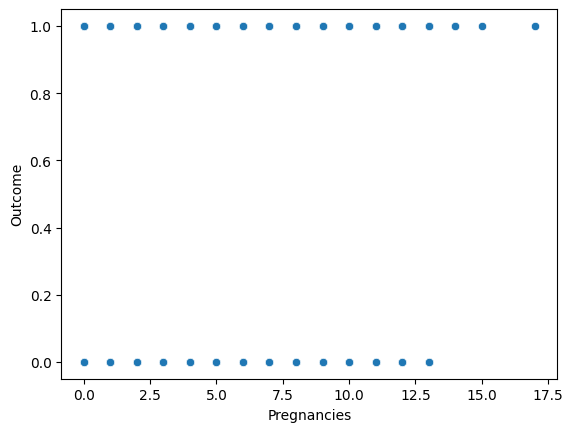

In [18]:
sns.scatterplot(data=df_diab, x='Pregnancies', y='Outcome')

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

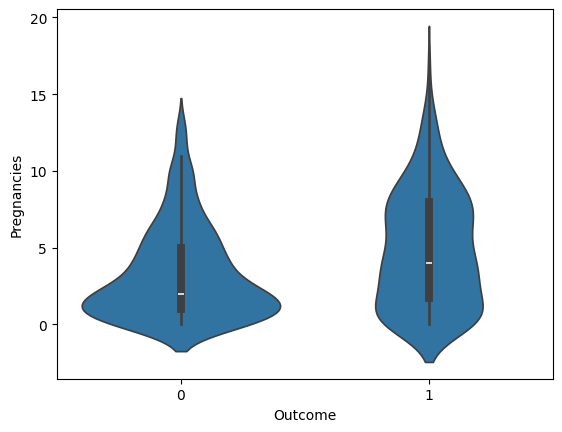

In [19]:
sns.violinplot(data=df_diab, y='Pregnancies', x='Outcome')

### <font color='darkorange'>Data wrangling</font>



Training testing split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_diabavgd.drop('Outcome', axis=1), df_diabavgd.Outcome, test_size=0.2, random_state=42)

### <font color="darkorange">Model building</font>

Here we will build our first random forest model!

In [21]:
from sklearn.ensemble import RandomForestClassifier

#1. Build the model
forest_classifier = RandomForestClassifier(n_estimators=1000, bootstrap=True, max_features = 0.8, max_samples = 0.8)

#2. Fit the model to the data
forest_classifier.fit(X_train, y_train)

RandomForestClassifier(max_features=0.8, max_samples=0.8, n_estimators=1000)

Let's also build a decision tree model for comparison.

In [22]:
from sklearn.tree import DecisionTreeClassifier

#1. Build the model
tree_classifier = DecisionTreeClassifier()

#2. Fit the model to the data
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

Make some predictions

In [23]:
#predictions from the forest model
y_forest_pred = forest_classifier.predict(X_test)

In [24]:
#predictions from the tree model
y_tree_pred = tree_classifier.predict(X_test)

Measure classification success

In [25]:
from sklearn.metrics import confusion_matrix

#confusion matrix
confusion_matrix(y_test, y_forest_pred)
confusion_matrix(y_test, y_tree_pred)

array([[77, 22],
       [22, 33]])

<Axes: >

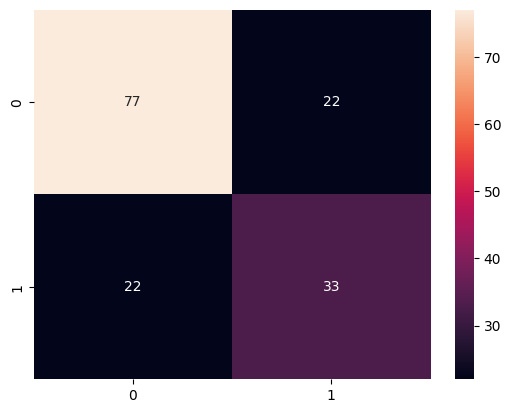

In [26]:
#more visual approach
sns.heatmap(confusion_matrix(y_test, y_tree_pred), annot=True, fmt='g')

<Axes: >

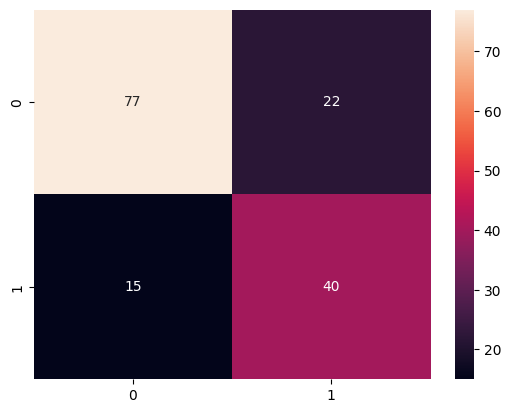

In [27]:
sns.heatmap(confusion_matrix(y_test, y_forest_pred), annot=True, fmt='g')

More detailed metrics?

In [28]:
print('Accuracy (forest): {:.2f}'.format(sk.metrics.accuracy_score(y_test, y_forest_pred)))
print('Accuracy (tree): {:.2f}'.format(sk.metrics.accuracy_score(y_test, y_tree_pred)))
print('Null Accuracy: {:.2f}'.format(1-(y_train.sum()/(y_train.count()))))


Accuracy (forest): 0.76
Accuracy (tree): 0.71
Null Accuracy: 0.65


In [29]:
print('Precision (tree): {:.2f}'.format(sk.metrics.precision_score(y_test, y_tree_pred)))
print('Recall (tree): {:.2f}'.format(sk.metrics.recall_score(y_test, y_tree_pred)))

Precision (tree): 0.60
Recall (tree): 0.60


<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/stopsign.jpg" width="100" alt="colab">
</p>

### <font color='darkorange'>Hyperparameter tuning</font>

Above we used the default values for how much randomness to include while building our trees for the random forest. Let's look at how we can use k-fold cross validation to help us choose how much randomness to use when building these trees!

One hyperparameter:

In [30]:
from sklearn.model_selection import cross_val_score

number_of_trees = [50, 100, 150, 200, 250, 300, 350]

for val in number_of_trees:
  scores = cross_val_score(RandomForestClassifier(n_estimators=val), X_train, y_train, cv=5, scoring='accuracy')
  print(scores.mean())

0.7557643609222977
0.7639077702252433
0.7704118352658936
0.7605890976942555
0.7638677862188459
0.7655204584832733
0.7622417699586832


Many hyperparameters:

In [31]:
from sklearn.model_selection import GridSearchCV

#define what parameters and what values to vary
parameters = {'max_features': [0.5,0.7,0.9,1.0],
              'n_estimators':list(range(50,200,50)),
              'max_samples':[0.5,0.7,0.9,0.99] }

#build the grid search algorithm
grid_search = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring='accuracy') #strattified cross validation when traget is binary or multiclass

#Use training data to perform the nfold cross validation
grid_search.fit(X_train, y_train)

#find the best hyperparameters
print(grid_search.best_params_)
grid_search.best_score_

{'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 150}


np.float64(0.7834332933493269)

<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/take_action.jpg" width="100" alt="colab">
</p>

We can see that this quickly becomes time consuming to run. There are many algorithms out there to help tune your models. They generally break down into exhaustive grid searches, vs random searches. But this is an active field that is growing all the time.

Now that we've tuned our random forest model let's see if we can beat the default model that we fit!

In [38]:
#1. build an optimized model
forest_classifier_opt = RandomForestClassifier(n_estimators=150,max_samples=0.5, max_features=0.7)

#2. Fit the model to the data
forest_classifier_opt.fit(X_train, y_train)

#3. make predictions
y_forest_pred_opt = forest_classifier_opt.predict(X_test)

#Measure accuracy
print('Accuracy: {:.2f}'.format(sk.metrics.accuracy_score(y_test, y_forest_pred_opt)))
print('Precision : {:.2f}'.format(sk.metrics.precision_score(y_test, y_forest_pred_opt)))
print('Recall : {:.2f}'.format(sk.metrics.recall_score(y_test, y_forest_pred_opt)))

Accuracy: 0.75
Precision : 0.64
Recall : 0.69


<Axes: >

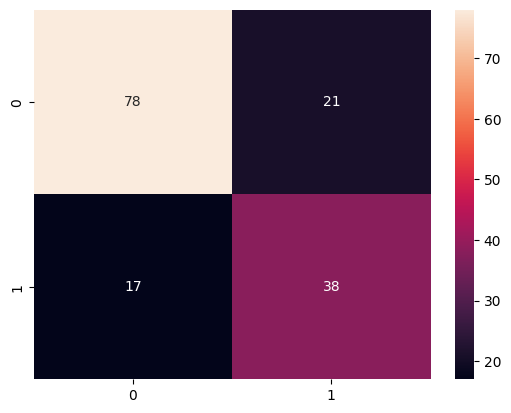

In [39]:
#calculate a confusion matrix
confusion_matrix(y_test, y_forest_pred_opt)

#Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_forest_pred_opt), annot=True, fmt='g')

Did your optimized model beat the default one?

Yes

### <font color='darkorange'>Bonus</font>

In [35]:
#Try adding other hyperparameters, how much better can you make the model by tuning?
#e.g., min_samples_split (how many points in a node are required to allow a split)
#e.g., max_depth (max depth of each tree)

<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/stopsign.jpg" width="100" alt="colab">
</p>

### <font color='darkorange'>Model interpretation</font>

Random forests are collections of many decision trees. This makes it a little more difficult to interpret how the predictions are being made, as there can be 1000s of individual trees.

Let's first take a look at one of the trees in your forest!


**Visualize one tree**

In [36]:
!pip install dtreeviz
import dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 4.1 MB/s eta 0:00:00


In [37]:
tree = forest_classifier_opt.estimators_[10]
viz = dtreeviz.model(
    model=tree,
    X_train=X_train,
    y_train=y_train,
    feature_names=X_train.columns.to_list(),
    target_name={0:'no',1:'yes'}
)
viz.view(fontname="DejaVu Sans")

**Visualize the overall impact of each variable**

Next, let's take a different approach and look at how to use feature importance to evaluate what is being used by the model overall to make predictions.

Remember, permutation importance will randomize the values of one feature and measure how much worse the model gets.

In [40]:
from sklearn.inspection import permutation_importance

#use permutation importance
perm_result = permutation_importance(forest_classifier_opt, X=X_test, y=y_test, scoring='accuracy', n_repeats=30)

#place values into a dataframe
forest_importances = pd.DataFrame({'variable':X_test.columns,'impo':perm_result.importances_mean.round(4), "sd":perm_result.importances_std.round(4)})

#sort the dataframe
forest_importances.sort_values(by='impo', ascending=False, inplace=True)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Glucose'),
  Text(1, 0, 'BMI'),
  Text(2, 0, 'DiabetesPedigreeFunction'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'BloodPressure'),
  Text(5, 0, 'Pregnancies'),
  Text(6, 0, 'Insulin'),
  Text(7, 0, 'SkinThickness')])

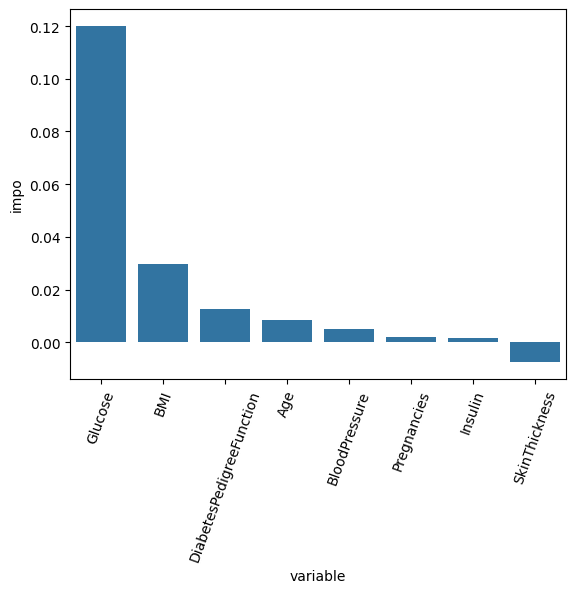

In [41]:
#plot the importance
sns.barplot(data=forest_importances, x='variable',y='impo')
plt.xticks(rotation=70)

<Axes: xlabel='impo', ylabel='variable'>

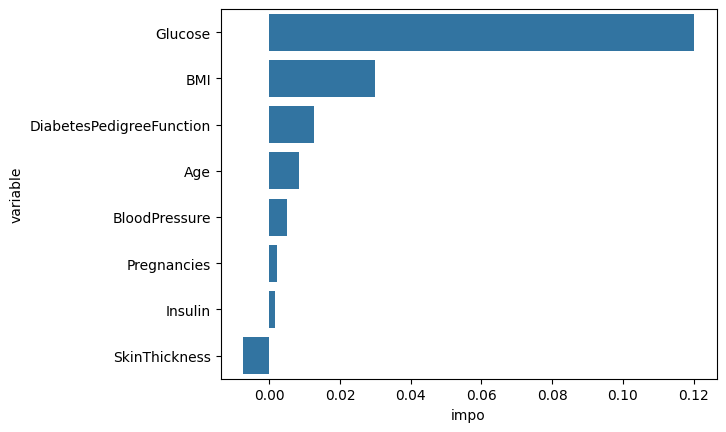

In [42]:
#plot the importance (switch axis to display labels better?)
sns.barplot(data=forest_importances, y='variable',x='impo')


**Visualize how changing one variable impacts the outcome**

Sometimes it can be very helpful to create a dataset that represents a question you have, and then use your model to make predictions to answer that question. For instance, what if someone had mean values for all measures?

In [43]:
#1. Create a dataframe
df_question = pd.DataFrame({'Pregnancies':X_train.Pregnancies.mean(),
                            'Glucose':X_train.Glucose.mean(),
                            'BloodPressure':X_train.BloodPressure.mean(),
                            'SkinThickness':X_train.SkinThickness.mean(),
                            'Insulin':X_train.Insulin.mean(),
                            'BMI':X_train.BMI.mean(),
                            'DiabetesPedigreeFunction':X_train.DiabetesPedigreeFunction.mean(),
                                'Age':X_train.Age.mean()},
                             index=[0])


#2. Use the model to make predictions
question_pred =  forest_classifier_opt.predict(df_question)

#3. Take a look at the answer
question_pred

array([1])

Now we can make our question a little more interesting by allowing one variable to vary. Let's see how the predictions change as we vary glucose of the average person.

These are called partial dependence plots.

In [45]:
#1. Create a dataframe
df_question = pd.DataFrame({'Pregnancies':X_train.Pregnancies.mean(),
                            'Glucose':list(range(0,200,10)),
                            'BloodPressure':X_train.BloodPressure.mean(),
                            'SkinThickness':X_train.SkinThickness.mean(),
                            'Insulin':X_train.Insulin.mean(),
                            'BMI':X_train.BMI.mean(),
                            'DiabetesPedigreeFunction':X_train.DiabetesPedigreeFunction.mean(),
                            'Age':X_train.Age.mean()})


#2. Use the model to make predictions
question_pred =  forest_classifier_opt.predict(df_question)

#3. Take a look at the answer
question_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

Let's plot the answer

<Axes: xlabel='Glucose', ylabel='predicted_diabetes'>

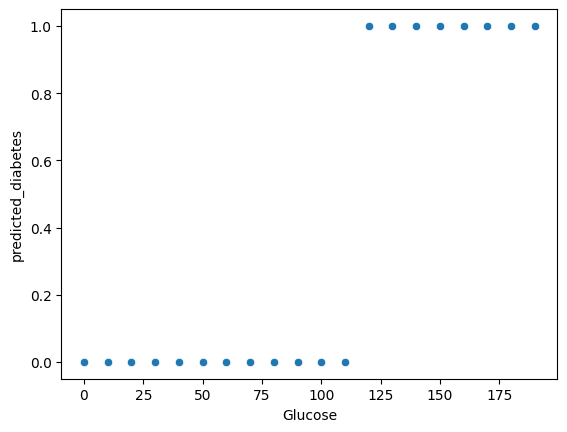

In [46]:
#add a column to the df_question
df_question['predicted_diabetes'] = question_pred

#plot the predictions
sns.scatterplot(data=df_question, x='Glucose',y='predicted_diabetes')

### <font color='darkorange'>Model Application</font>

Let's apply what we learnt about random forests to another dataset.

In [47]:
#load dataset!

### <font color='darkorange'>Further reading</font>

> If you would like the notebook without missing code check out the [full code](https://colab.research.google.com/github/tbonne/peds/blob/main/docs/fullNotebooks/full_Intro_RandomForest.ipynb) version.